## Pesquisa Sócio Econômica 2020 - Passos Mágicos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from pywaffle import Waffle

### **Explorando os dados**

Analisando os dados da Pesquisa Sócio Econômica da Passos Mágicos na ano de 2020. A pesquisa compilada foram das pessoas responsáveis pelo domicílio.

In [3]:
df = pd.read_excel("../dados/PSE2020_domicílios.xlsx", sheet_name = "PSE2020_domicílios")

In [4]:
df.head(3)

,V010,V100_first,V104_max,V101_first,V102_first,V106_first,D1601_sum,D1602_sum,D1603_sum,D1604D,...,V511_first,V512_first,V513_first,V514_first,V515_first,V516_first,V517_first,V518_first,V519_first,filter_$
0,2020A1000,2020,4,Jéssica,Centro,Pessoa responsável pelo domicílio,1,0,2,Com Cônjuge,...,Alugado,3,Não,Sim,"Sim, somente de tela fina (LED, LCD ou plasma)",Não,Sim,Sim,Sim,Not Selected
1,2020A1001,2020,4,Jéssica,Centro,Pessoa responsável pelo domicílio,1,0,1,Com Cônjuge,...,Próprio de algum morador - já pago,4,Não,Sim,"Sim, somente de tela fina (LED, LCD ou plasma)",Sim,Sim,Sim,Não,Not Selected
2,2020A1002,2020,3,Jéssica,Centro,Pessoa responsável pelo domicílio,0,0,2,Sem Cônjuge,...,Próprio de algum morador - já pago,2,Sim,Sim,"Sim, somente de tela fina (LED, LCD ou plasma)",Sim,Sim,Sim,Sim,Not Selected


In [5]:
# Retirando as colunas do ano (todos são 2020) e entrevistador(a)
cols_a_retirar = ["V100_first", "V101_first", "V106_first", "filter_$"]
dados = df.drop(columns=cols_a_retirar)
dados.head(3)

,V010,V104_max,V102_first,D1601_sum,D1602_sum,D1603_sum,D1604D,D1605D,D1606D,V107_first,...,V510_first,V511_first,V512_first,V513_first,V514_first,V515_first,V516_first,V517_first,V518_first,V519_first
0,2020A1000,4,Centro,1,0,2,Com Cônjuge,Com filhos,União ou casamento sexo diferente,Homem,...,Gás de botijão,Alugado,3,Não,Sim,"Sim, somente de tela fina (LED, LCD ou plasma)",Não,Sim,Sim,Sim
1,2020A1001,4,Centro,1,0,1,Com Cônjuge,Com filhos,União ou casamento sexo diferente,Homem,...,Gás de botijão,Próprio de algum morador - já pago,4,Não,Sim,"Sim, somente de tela fina (LED, LCD ou plasma)",Sim,Sim,Sim,Não
2,2020A1002,3,Centro,0,0,2,Sem Cônjuge,Com filhos,Monoparental,Mulher,...,Gás de botijão,Próprio de algum morador - já pago,2,Sim,Sim,"Sim, somente de tela fina (LED, LCD ou plasma)",Sim,Sim,Sim,Sim


#### Dados gerais

**Dicionário dos dados**

- **V010:** código do domicílio (ID)
- **V102_first:** Código do núcleo do Passos Mágicos
- **V104_max:** Total de moradores da habitação
- **D1601_sum:** Cônjuge de sexo diferente
- **D1602_sum:** Cônjuge do mesmo sexo
- **D1603_sum:** Total de filhos e/ou enteados
- **D1604D:** Cônjuge no domicílio
- **D1605D:** Filhos e/ou enteados no domicílio
- **D1606D:** Arranjo familiar
- **V107_first:** Sexo biológico do responsável
- **D1701_sum:** Total de homens no domicílio
- **D1702_sum:** Total de mulheres no domicílio
- **D108_first:** Idade do responsável
- **V109_first:** cor/raça do responsável
- **V201_first:** relação do responsável com a Passos Mágicos

In [6]:
cols_gerais = ["V010", "V102_first", "V104_max", "D1601_sum", "D1602_sum", "D1603_sum", "D1604D", "D1605D", 
               "D1606D", "V107_first", "D1701_sum", "D1702_sum", "D108_first", "V109_first", "V201_first"]

df_pm_gerais = dados[cols_gerais]
df_pm_gerais.head(3)

,V010,V102_first,V104_max,D1601_sum,D1602_sum,D1603_sum,D1604D,D1605D,D1606D,V107_first,D1701_sum,D1702_sum,D108_first,V109_first,V201_first
0,2020A1000,Centro,4,1,0,2,Com Cônjuge,Com filhos,União ou casamento sexo diferente,Homem,2,2,41,Branca,Pai ou mãe de aluno(a) ativo (atualmente cursa...
1,2020A1001,Centro,4,1,0,1,Com Cônjuge,Com filhos,União ou casamento sexo diferente,Homem,2,2,57,Branca,Pai ou mãe de aluno(a) ativo (atualmente cursa...
2,2020A1002,Centro,3,0,0,2,Sem Cônjuge,Com filhos,Monoparental,Mulher,1,2,47,Branca,Pai ou mãe de aluno(a) ativo (atualmente cursa...


Possível notar que foram mantidos apenas os valores que possuem 2 ou mais valores, tanto nas variáveis categóricas quanto numéricas

In [7]:
df_pm_gerais.describe(exclude=np.number)

,V010,V102_first,D1604D,D1605D,D1606D,V107_first,V109_first,V201_first
count,654,654,654,654,654,654,654,654
unique,654,4,2,2,4,2,5,5
top,2020A1000,Centro,Com Cônjuge,Com filhos,União ou casamento sexo diferente,Mulher,Parda,Pai ou mãe de aluno(a) ativo (atualmente cursa...
freq,1,288,498,644,493,354,307,616


##### Demográfico - População total por sexo

In [8]:
mulheres = dados.D1702_sum.sum()

In [9]:
homens = dados.D1701_sum.sum()

In [10]:
total = mulheres + homens
pct_mulheres = (100 *mulheres/total).round(0)
pct_homens = (100 * homens/total).round(0)

##### Demográfico - População por cor/raça

In [11]:
pop_cor_raca = dados.copy()
pop_cor_raca["pop"] =  dados["D1701_sum"] + dados["D1702_sum"]
pop_cor_raca = pop_cor_raca.groupby("V109_first")[["pop"]].sum().reset_index()
pop_cor_raca.columns = ["cor_raca", "qtd"]
pop_cor_raca

fig = px.bar(pop_cor_raca, x="qtd", y="cor_raca", color = "cor_raca", text_auto=True,
             color_discrete_sequence=["#fec52b","#00b050","#f58334", "#ed3237", "#0367b0"],
             category_orders={'cor_raca':["Parda", "Preta", "Branca", "Amarela","Indígena"]})

# Ajustando o layout do gráfico
fig.update_layout(width=700, height=300, font_family = 'Open Sans', font_color= "black", 
                  title_font_color= "black", title_font_size=24, title_text='População por Cor ou Raça' + 
                  '<br><sup size=1 style="color:#555655">Segundo o PSE 2020</sup>', xaxis_title='', yaxis_title='',
                  xaxis_tickfont_size=14, yaxis_tickfont_size=14, xaxis_range = [0,1350], 
                  plot_bgcolor= "#f8f9fa", showlegend=False)


fig.update_traces(textfont_size=15, textposition="outside", texttemplate='<b>%{x}</b>', cliponaxis=False)

fig.show()

##### Demográfico - População total por sexo do chefe do domicílio

In [12]:
domicilio_sexo_resp = dados.V107_first.value_counts()
domicilio_sexo_resp.index = ["Mulheres", "Homens"]

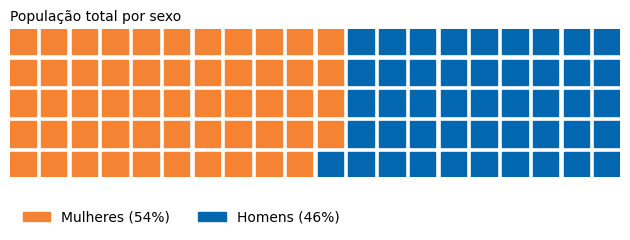

In [13]:
domicilio_sexo_resp = dados.V107_first.value_counts()
domicilio_sexo_resp.index = ["Mulheres", "Homens"]
total = domicilio_sexo_resp.sum()
pct_mulheres = (100 * domicilio_sexo_resp.loc["Mulheres"]/total).round(0)
pct_homens = (100 * domicilio_sexo_resp.loc["Homens"]/total).round(0)

data = {'Mulheres': pct_mulheres, 'Homens': pct_homens}
fig = plt.figure(FigureClass=Waffle, rows=5, values=data, colors=["#f58334", "#0367b0"],
                title={'label': 'População total por sexo', 'loc': 'left', 'size':10},
                labels=[f"{k} ({v:.0f}%)" for k, v in data.items()],
                legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
                starting_location='NW', block_arranging_style='snake')

##### Demográfico - Responsável pelo domicílio por cor/raça

In [14]:
pop_cor_raca = dados.V109_first.value_counts().to_frame().reset_index()
pop_cor_raca.columns = ["cor_raca", "qtd"]

fig = px.bar(pop_cor_raca, x="qtd", y="cor_raca", color = "cor_raca", text_auto=True,
             color_discrete_sequence=["#fec52b","#00b050","#f58334", "#ed3237", "#0367b0"],
             category_orders={'cor_raca':["Parda", "Preta", "Branca", "Amarela","Indígena"]})

# Ajustando o layout do gráfico
fig.update_layout(width=700, height=300, font_family = 'Open Sans', font_size=15, font_color= "black", 
                  title_font_color= "black", title_font_size=24, title_text='População por Cor ou Raça' + 
                  '<br><sup size=1 style="color:#555655">Segundo o PSE 2020</sup>', xaxis_title='', yaxis_title='',
                  xaxis_tickfont_size=14, yaxis_tickfont_size=14, xaxis_range = [0,350], 
                  plot_bgcolor= "#f8f9fa", showlegend=False)

fig.update_traces(textfont_size=15, textposition="outside", texttemplate='<b>%{x}</b>', cliponaxis=False)

fig.show()

##### Demográfico - Domicílios por nº de moradores

In [46]:
print(dados.V104_max.mean(), dados.V104_max.median(), dados.V104_max.mode()[0])

4.087155963302752 4.0 4


In [18]:
domicilio_n_moradores = dados.V104_max.value_counts().to_frame()
domicilio_n_moradores.loc["1"], domicilio_n_moradores.loc["9"] = 0, 0
domicilio_n_moradores = domicilio_n_moradores.reset_index()
domicilio_n_moradores.columns = ["Nº de Moradores", "Nº de Domicílios"]
domicilio_n_moradores

,Nº de Moradores,Nº de Domicílios
0,4,248
1,3,158
2,5,132
3,6,50
4,2,45
5,7,13
6,8,7
7,10,1
8,1,0
9,9,0


In [25]:
domicilio_n_moradores = dados.V104_max.value_counts().to_frame()
domicilio_n_moradores.loc["1"], domicilio_n_moradores.loc["9"] = 0, 0
domicilio_n_moradores = domicilio_n_moradores.reset_index()
domicilio_n_moradores.columns = ["Nº de Moradores", "Nº de Domicílios"]

fig = px.histogram(domicilio_n_moradores, x="Nº de Moradores", y="Nº de Domicílios", 
                   text_auto=True, color_discrete_sequence=["#68a4d0"], nbins= 10)

# Ajustando o layout do gráfico
fig.update_layout(width=700, height=500, font_family = 'Open Sans', font_color= "black", 
                  title_font_color= "black", title_font_size=24, title_text='Distribuição dos domicílios por nº de moradores' + 
                  '<br><sup size=1 style="color:#555655">Segundo o PSE 2020</sup>', 
                  xaxis_title='Nº de Moradores', yaxis_title='Nº de Domicílios',
                  xaxis_tickfont_size=14, yaxis_tickfont_size=14, yaxis_range = [0,270], 
                  plot_bgcolor= "#f8f9fa", showlegend=False, bargap=0.1)

fig.update_xaxes(tickmode='array', tickvals=np.arange(1,11))
fig.update_traces(textfont_size=15, textposition="outside", texttemplate='<b>%{y}</b>', cliponaxis=False)

fig.show()

##### Demográfico - Domicílios pelo arranjo familiar

In [41]:
domicilio_arranjo_familiar = dados.D1606D.value_counts().to_frame().reset_index()
domicilio_arranjo_familiar.columns = ["arranjo", "qtd"]

fig = px.bar(domicilio_arranjo_familiar, x="qtd", y="arranjo", color = "arranjo", text_auto=True,
             color_discrete_sequence=["#fec52b","#00b050", "#ed3237", "#0367b0"])

# Ajustando o layout do gráfico
fig.update_layout(width=700, height=500, font_family = 'Open Sans', font_size=15, font_color= "black", 
                  title_font_color= "black", title_font_size=24, title_text='Distribuição dos domicílios pelos arranjos familiares' + 
                  '<br><sup size=1 style="color:#555655">Segundo o PSE 2020</sup>', xaxis_title='', yaxis_title='',
                  xaxis_tickfont_size=14, yaxis_tickfont_size=14, xaxis_range = [0,550], 
                  plot_bgcolor= "#f8f9fa", showlegend=False)

fig.update_yaxes(tickmode='array', tickvals=np.arange(0,4), ticktext = ["União ou casamento<br>(indivíduos de sexo<br>diferente)",
                                                                   "Monoparental",
                                                                   "Consanguíneo",
                                                                   "União ou casamento<br>(indivíduos do<br>mesmo sexo)"])

fig.update_traces(textfont_size=15, textposition="outside", texttemplate='<b>%{x}</b>', cliponaxis=False)

fig.show()

#### Dados estudantes

**Dicionário dos dados**

- ** :** aaaa

In [26]:
cols_estudantes = ["V010", "V102_first", "D201_sum", "D202_sum", "D202A_sum", "D202B_sum", 
                   "D202C_sum", "D202D_sum", "D202E_sum", "D202F_sum", "D202G_sum", "D204_sum"]
df_pm_estudantes = dados[cols_estudantes]
df_pm_estudantes.head(3)

,V010,V102_first,D201_sum,D202_sum,D202A_sum,D202B_sum,D202C_sum,D202D_sum,D202E_sum,D202F_sum,D202G_sum,D204_sum
0,2020A1000,Centro,1,0,0,0,0,0,0,0,0,0
1,2020A1001,Centro,1,0,0,0,0,0,0,0,0,0
2,2020A1002,Centro,2,1,1,0,0,0,0,0,0,0


#### Dados de ocupação

**Dicionário dos dados**

- ** :** aaaa

In [27]:
cols_ocupacao = ["V010", "V102_first", "D301_sum", "D302_sum", "D303_sum", "D304_sum",
                  "D305_sum", "D306_sum", "D307_sum", "D316A_sum", "D316B_sum", "D330" ]
df_pm_ocupacao = dados[cols_ocupacao]
df_pm_ocupacao.head(3)

,V010,V102_first,D301_sum,D302_sum,D303_sum,D304_sum,D305_sum,D306_sum,D307_sum,D316A_sum,D316B_sum,D330
0,2020A1000,Centro,3,1,0,0,2,1,0,0,2,privação de trabalho formal
1,2020A1001,Centro,4,2,0,0,2,2,0,1,1,não
2,2020A1002,Centro,2,1,0,0,1,1,0,0,1,privação de trabalho formal


#### Dados de renda familiar

**Dicionário dos dados**

- ** :** aaaa

In [28]:
cols_renda = ["V010", "V102_first", "D319_sum", "D401_sum", "V402_sum", "D403_sum", "V404_sum", "D405_sum", "V406_sum", "D407_sum", 
              "V408_sum", "D409_sum", "V410_sum", "D411_sum", "V412_sum", "D413_sum", "V414_sum", "D415_sum", "D416_sum", "D420_sum", 
              "D421", "D422", "D423", "D425", "D499"]
df_pm_renda = dados[cols_renda]
df_pm_renda.head(3)

,V010,V102_first,D319_sum,D401_sum,V402_sum,D403_sum,V404_sum,D405_sum,V406_sum,D407_sum,...,D413_sum,V414_sum,D415_sum,D416_sum,D420_sum,D421,D422,D423,D425,D499
0,2020A1000,Centro,2613,0,0,0,0,0,0,0,...,0,0,0,0,2613,renda do trabalho,653.250000,"R$ 557,01 a R$ 836,00","R$ 2.091,00 a R$ 3.135,00 [3 SM]",PSE2020
1,2020A1001,Centro,2613,0,0,0,0,0,0,1,...,0,0,1400,0,4013,trabalho e programas sociais,1003.250000,"R$ 836,01 a R$ 1.115,00","R$ 3.136,00 a R$ 4.180,00 [4 SM]",EG
2,2020A1002,Centro,1568,0,0,0,0,0,0,0,...,0,0,0,0,1568,renda do trabalho,522.666667,"R$ 278,01 a R$ 557,00","R$ 1.046,00 a R$ 1.568,00 [1,5 SM]",PSE2020


In [29]:
valores = [
    "V010", "V100_first", "V104_max", "V101_first", "V102_first", "V106_first", "D1601_sum", "D1602_sum", "D1603_sum", "D1604D",
    "D1605D", "D1606D", "V107_first", "D1701_sum", "D1702_sum", "D108_first", "V109_first", "V201_first", "D201_sum", "D202_sum",
    "D202A_sum", "D202B_sum", "D202C_sum", "D202D_sum", "D202E_sum", "D202F_sum", "D202G_sum", "D204_sum", "D301_sum", "D302_sum",
    "D303_sum", "D304_sum", "D305_sum", "D306_sum", "D307_sum", "D316A_sum", "D316B_sum", "D330", "D319_sum", "D401_sum", "V402_sum",
    "D403_sum", "V404_sum", "D405_sum", "V406_sum", "D407_sum", "V408_sum", "D409_sum", "V410_sum", "D411_sum", "V412_sum", "D413_sum",
    "V414_sum", "D415_sum", "D416_sum", "D420_sum", "D421", "D422", "D423", "D425", "D499", "V501_first", "V502_first", "V503_first",
    "V504_first", "V505_first", "V506_first", "V507_first", "V508_first", "V509_first", "V510_first", "V511_first", "V512_first", "V513_first",
    "V514_first", "V515_first", "V516_first", "V517_first", "V518_first", "V519_first"
]

#### Dados de moradia

**Dicionário dos dados**

- ** :** aaaa

In [30]:
cols_moradia= ["V010", "V102_first", "V501_first", "V502_first", "V503_first", "V504_first", "V505_first", "V506_first", "V507_first", 
              "V508_first", "V509_first", "V510_first", "V511_first", "V512_first", "V513_first", "V514_first", "V515_first", 
              "V516_first", "V517_first", "V518_first", "V519_first"]
df_pm_moradia = dados[cols_moradia]
df_pm_moradia.head(3)

,V010,V102_first,V501_first,V502_first,V503_first,V504_first,V505_first,V506_first,V507_first,V508_first,...,V510_first,V511_first,V512_first,V513_first,V514_first,V515_first,V516_first,V517_first,V518_first,V519_first
0,2020A1000,Centro,Casa,"Cerâmica, lajota ou pedra",4,2,Canalizada em pelo menos um cômodo,1,0,Fossa não ligada à rede,...,Gás de botijão,Alugado,3,Não,Sim,"Sim, somente de tela fina (LED, LCD ou plasma)",Não,Sim,Sim,Sim
1,2020A1001,Centro,Casa,"Cerâmica, lajota ou pedra",3,2,Canalizada em pelo menos um cômodo,1,0,"Rede geral, rede pluvial ou fossa ligada à rede",...,Gás de botijão,Próprio de algum morador - já pago,4,Não,Sim,"Sim, somente de tela fina (LED, LCD ou plasma)",Sim,Sim,Sim,Não
2,2020A1002,Centro,Casa,"Cerâmica, lajota ou pedra",4,3,Canalizada em pelo menos um cômodo,1,0,"Rede geral, rede pluvial ou fossa ligada à rede",...,Gás de botijão,Próprio de algum morador - já pago,2,Sim,Sim,"Sim, somente de tela fina (LED, LCD ou plasma)",Sim,Sim,Sim,Sim
